In [2]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import dask.dataframe as dd
from mpl_interactions import ioff, panhandler, zoom_factory

import re


In [108]:
# ddf = dd.read_hdf(os.path.join("../../../../Google Drive/My Drive/Data/ATPC/ATPC_gamma/", 'ATPC_gamma_714298_0.h5'), key = 'hits')
# ddf = dd.read_hdf(os.path.join("../data/ATPC_gamma/", 'ATPC_gamma_714298_0.h5'), key = 'hits')
hits = pd.read_hdf("../config/ATPC_0nubb_SF2_733820_16.h5", 'hits')
display(hits)

event_hits = hits[hits.event_id == 5100]

parts = pd.read_hdf("../config/ATPC_0nubb_SF2_733820_16.h5", 'parts')
event_parts = parts[parts.event_id == 5100]
display(event_parts)

,event_id,x,y,z,energy
0,5100,-188.321808,978.215698,1856.218140,0.000025
1,5100,-187.436996,987.289673,1857.790405,0.000125
2,5100,-190.492096,983.638611,1859.324585,0.000025
3,5100,-194.273071,978.829285,1859.985962,0.000025
4,5100,-177.870361,991.862183,1862.330933,0.000100
...,...,...,...,...,...
873649,5340,738.416138,1319.568604,2050.117676,0.000025
873650,5340,758.068909,1332.574097,2051.282715,0.000025
873651,5340,765.246277,1323.556519,2051.401367,0.000050
873652,5340,745.201660,1315.657471,2051.776855,0.000100


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,5100,2,e-,1,0,-238.925644,636.130920,-1070.811768,0.000000,-185.780136,...,-0.509944,1.559752,0.615066,0.0,-0.0,0.0,1.314458,1584.241699,none,eIoni
1,5100,110,e-,0,2,-185.748581,989.140930,-1118.181274,6.153450,-185.756317,...,-0.015911,0.009369,0.030663,-0.0,-0.0,-0.0,0.001252,0.058882,eIoni,eIoni
2,5100,109,e-,0,2,-185.913757,989.325928,-1118.298096,6.140765,-185.912888,...,0.003949,0.002322,-0.000170,0.0,0.0,0.0,0.000021,0.001017,eIoni,msc
3,5100,108,e-,0,2,-185.913757,989.325928,-1118.298096,6.140765,-185.913528,...,0.001349,0.006169,0.002644,0.0,0.0,0.0,0.000046,0.002845,eIoni,eIoni
4,5100,107,e-,0,2,-185.913757,989.325928,-1118.298096,6.140765,-185.912918,...,0.003557,-0.001639,-0.002383,-0.0,0.0,0.0,0.000021,0.001551,eIoni,msc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,5100,456,e-,0,1,-257.637054,500.678467,-979.968506,0.773851,-257.775604,...,-0.081404,0.024499,-0.008784,-0.0,-0.0,-0.0,0.007098,0.548275,eIoni,eIoni
712,5100,455,e-,0,1,-255.624786,502.134277,-985.782776,0.751441,-255.712189,...,-0.055969,0.043416,-0.005202,-0.0,0.0,0.0,0.004912,0.295399,eIoni,eIoni
713,5100,454,e-,0,1,-194.459442,590.466125,-1066.488770,0.238197,-194.483200,...,-0.035193,-0.044244,-0.015666,-0.0,-0.0,-0.0,0.003356,0.261123,eIoni,eIoni
714,5100,453,e-,0,1,-202.802155,603.677551,-1073.458008,0.177937,-202.841171,...,-0.058175,-0.033023,0.041412,-0.0,0.0,-0.0,0.006021,0.602956,eIoni,eIoni


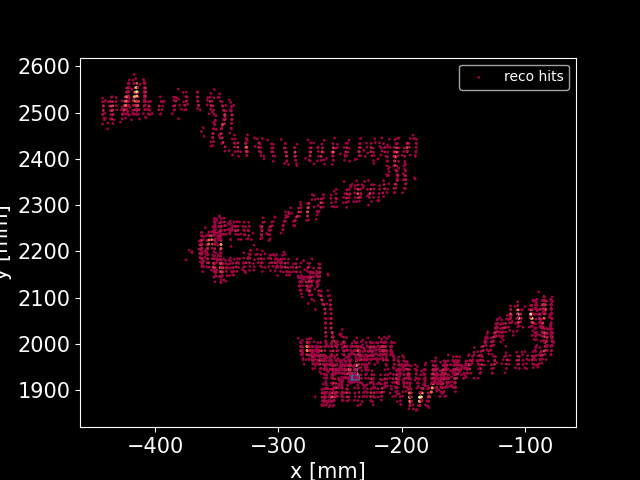

In [109]:

# Make a 3D view of the track
%matplotlib widget
# fig  = plt.figure(figsize=(10, 10))
with plt.ioff():
    fig, axis = plt.subplots()

# Create 3D axes
ax = fig.add_subplot(111)

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_parts[event_parts.primary==1].initial_x, event_parts[event_parts.primary==1].initial_z+3000, s=50)
ax.scatter(event_hits.x, event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")


ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
# ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
# ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
# ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# ax.set_xlim(-2000, -500)
# ax.set_ylim(4000, 5500)
# ax.set_ylim(1500, 3000)

legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

disconnect_zoom = zoom_factory(axis)
# Enable scrolling and panning with the help of MPL
# Interactions library function like panhandler.
pan_handler = panhandler(fig)
display(fig.canvas)

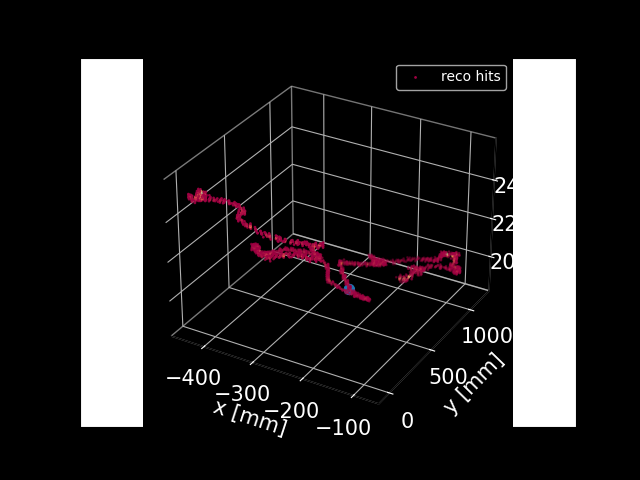

In [105]:
%matplotlib widget



# Make a 3D view of the track
# fig  = plt.figure(figsize=(10, 10))
with plt.ioff():
    fig, axis = plt.subplots()

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_hits.x, event_hits.y,  event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")
ax.scatter(event_parts[event_parts.primary==1].initial_x, event_parts[event_parts.primary==1].initial_y, event_parts[event_parts.primary==1].initial_z+3000, s=50)

ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax.set_xlim(-100, 400)
# ax.set_ylim(0, 1000)
# ax.set_zlim(1500, 3000)


legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

disconnect_zoom = zoom_factory(axis)
# Enable scrolling and panning with the help of MPL
# Interactions library function like panhandler.
pan_handler = panhandler(fig)
display(fig.canvas)